# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

*From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.*


Since the most important objective (among many) of a dealership is to maximize profit, and profit is given by the difference between sale price and acquisition price of a vehicle (adjusted for overhead), one of the most important functions of a dealership is fairly appraising the sale value of given vehicle. This appraisal is important in not just setting the list price for a given vehicle, but also in driving the dealership's decisions to buy cars for a fixed wholesale price, or to offer a given price to a prospective vehicle seller.

This task is complicated by the fact that, unlike new car dealerships who have a very strong price signal in the form of MSRPs, as well as a great deal of data on actual sale prices for mostly-identical cars, used car prices are much more variable. There are many more variables to factor in, there is greater variation in overall quality, and there aren't anywhere near as many truly comparable vehicles for any given item of inventory.

The available data comes in the form of a large dataset of sales data, along with representative variables. Speaking generally, the dataset includes information about:
- Geography, which can influence sale prices, in that some areas will have overall higher sale prices across many car types, while others will have overall lower prices.
- Standard identifying attributes like year, make, and model.
- Attributes of a given model that are common across all cars, such as cylinders, fuel, transmission, drive, size, and color.
- Attributes of a specific instance of car, which may differentiate it from other instances that would have been identical at the time they were originally sold, but which now differ; these include condition, odometer readings, title status, and state.
- Actual sale prices, which can be used as a signal for predicting sale prices for similar vehicles.
- Unique identifiers, including VIN and an opaque token.

Therefore, the task is to select the features that will have a strong predictive value on price (excluding those that have zero or little impact, such as VIN and color) and train a model that will predict price. The predicted price value can then be used by the dealer to influence purchasing and pricing decisions.

### Data Understanding

*After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.*

Understanding the data will consist of the following steps:
- Enumerating and defining each attribute and how it is represented.
- Examining the range of values for each attribute.

In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [414]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [415]:
base = '/content/drive/MyDrive/AI ML Certificate with Berkeley Haas/practical_application_II_starter'
vehicles = pd.read_csv(base + '/data/vehicles.csv')

In [416]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [417]:
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [418]:
vehicles.sample(20)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
258920,7303341490,south jersey,4200,2004.0,honda,pilot,NaN,6 cylinders,gas,123361.0,clean,automatic,2HKYF18774H618689,NaN,NaN,SUV,silver,nj
334909,7309116072,philadelphia,0,2011.0,ford,explorer,NaN,NaN,gas,141520.0,clean,automatic,1FMHK8F87BGA29364,4wd,NaN,SUV,blue,pa
46200,7315295302,redding,0,2016.0,hyundai,sonata 2.4l sport,NaN,4 cylinders,gas,22155.0,clean,automatic,5NPE34AF6GH275182,fwd,NaN,sedan,NaN,ca
40559,7306682231,monterey bay,12992,2011.0,mini,hardtop,NaN,4 cylinders,gas,32525.0,clean,other,WMWSV3C59BTY20837,fwd,NaN,coupe,black,ca
291026,7309512393,cincinnati,3500,2005.0,mercedes-benz,NaN,fair,6 cylinders,gas,95000.0,clean,automatic,NaN,NaN,NaN,convertible,black,oh
210634,7312143106,bemidji,14500,2011.0,toyota,camry xle,like new,4 cylinders,gas,59777.0,clean,automatic,NaN,fwd,mid-size,sedan,silver,mn
426695,7305630735,wyoming,19900,2007.0,ford,f450 xl,NaN,NaN,gas,50000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
34887,7315892877,los angeles,9000,2005.0,toyota,highlander v6 limted,like new,6 cylinders,gas,91928.0,clean,automatic,JTEDP21A650067981,fwd,full-size,SUV,white,ca
37409,7314053169,modesto,1111111111,2020.0,jeep,NaN,NaN,NaN,gas,1000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,ca
26530,7313990202,fresno / madera,0,2021.0,chevrolet,trailblazer,NaN,NaN,gas,21275.0,clean,automatic,KL79MPSL5MB011885,fwd,full-size,SUV,NaN,ca


In [419]:
print(f"Number of unique IDs: {vehicles['id'].nunique()} out of {len(vehicles['id'])}")
print(f"Number of unique VIN: {vehicles['VIN'].nunique()} out of {len(vehicles['VIN'])}")
print(vehicles['VIN'].value_counts())

Number of unique IDs: 426880 out of 426880
Number of unique VIN: 118246 out of 426880
VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
JF2SHBBC9CH421470      1
1GCEK19K3SE260988      1
WP0CA299X1S651097      1
WBA5R1C59KAJ98838      1
1G1PE5SB4E7135050      1
Name: count, Length: 118246, dtype: int64


In [420]:
#print(vehicles[['region']].value_counts())
#print(vehicles['manufacturer'].value_counts())
#print(vehicles['price'].value_counts())
#print(vehicles['year'].value_counts())
#print(vehicles['manufacturer'].value_counts())
print(vehicles['model'].value_counts())
#print(vehicles['condition'].value_counts())
#print(vehicles['cylinders'].value_counts())
#print(vehicles['fuel'].value_counts())
#print(vehicles['title_status'].value_counts())
#print(vehicles['transmission'].value_counts())
#print(vehicles['drive'].value_counts())
#print(vehicles['size'].value_counts())
#print(vehicles['type'].value_counts())
#print(vehicles['paint_color'].value_counts())
#print(vehicles['state'].value_counts())


model
f-150                8009
silverado 1500       5140
1500                 4211
camry                3135
silverado            3023
                     ... 
avenger, se             1
INTERNATIONAL RV        1
1500 longhorn 4x4       1
1500, slt               1
scottdale big 10        1
Name: count, Length: 29649, dtype: int64


In [421]:
model_1500_counts = vehicles[vehicles['model'].astype(str).str.contains('1500')]['model'].value_counts()
print(model_1500_counts)

model
silverado 1500                       5140
1500                                 4211
sierra 1500                          1658
1500 crew cab big horn                635
silverado 1500 regular                614
                                     ... 
sierra 1500 limited                     1
1500 big horn hemi                      1
trx 1500                                1
1500 slt crew cab swb 4wd               1
1500 big horn/lone star automatic       1
Name: count, Length: 1108, dtype: int64


In [422]:
# Fuel is _not_ redundant with model, as models can come in multiple fuel variants.
vehicles[vehicles['model'] == 'camry']['fuel'].value_counts()

,count
fuel,
gas,2994
other,64
hybrid,50
diesel,2
electric,2


The following attributes are present:
- `id`: IDs for each vehicle, all of which are fully unique. Present for all rows.
- `region`: Lowercase, broadly spread, partially non-canonical place names (e.g., "west virginia (old)"). Present for all rows. This would potentially have predictive value if regions were common enough to have substantial training data, but there are too many unique values with only a few vehicles. This could also have value if we had a dataset to aggregate these at lower granularity. However, the value from this column can largely be replaced with `state`, so `region` can be dropped.
- `price`: Integer values for price, broadly distributed but with some common values (e.g., 3169 vehicles selling for exactly \\$6995). However, the most common value, \\$0, is present in 32895 rows and is almost certainly bogus; these rows are likely useless for training a model whose central output is price.
- `year`: Expressed as a single-point float value, representing the vehicle's model year. Present for all rows, except for a small minority, which can be dropped.
- `manufacturer`: Canonical manufacturer names, in lowercase. Present for approximately 96% of rows. Since manufacturer is such an important factor in the value of a car, and since so little data lacks this, rows missing this can be dropped. _However_, since model names are unique among manufacturers, this column is redundant with `model`, and as such it can be dropped (even though manufacturer, in the absence of model, is itself an independent determiner of price).
- `model`: Partially standardized values representing the model of a car. In some but not all cases, trim levels are included; e.g., both "1500" and "1500, slt" are present. This is a complicated topic; see below for a more complete discussion. Present for nearly all rows; missing rows can be dropped.
- `condition`: Five ordinal values (in order, "like new", "excellent", "good", "fair", "salvage") in 59% cases, and missing (which we can treat as "unknown" as a class of its own). Since missing values cannot be reliably placed in a scale with condition, various approaches are available for handling this row, all of which are worth investigation:
  - Discard the ordinal nature of the variable, and treat it as having six classes.
  - Create a "known/unknown" boolean column, and an ordinal column for when the condition is known.
  - Arbitrarily select an ordinal position for missing values.
  - Drop missing values.
- `cylinders`: One of 8 values, but present in only 58% of rows. Given the scarcity of this value, as well as the fact that this value is already uniquely determined by make, model and year (and therefore redundant with the combination of these), it is unlikely that this column adds significant value.
- `fuel`: One of five values, present in almost all rows. Since this value is _sometimes_ but not _always_ uniquely determined by make, model, and year (e.g., model='camry' is present in all fuel types), this is worth retaining.
- `odometer`: Single-precision floating point values, present in nearly all vehicles, and very important to the sale price.
- `title_status`: One of six canonical values, present in 98% of cases. Vehicles missing this crucial variable are of unpredictable value, so rows with this missing can be dropped.
- `transmission`: One of three values, almost always present, not uniquely determined by model, and very important to valuation. Rows with this missing can be dropped.
- `VIN`: Supposedly a unique identifier for each vehicle, but only about a quarter of the values are actually unique. About half are missing.
- `drive`: Only 3 values, but also very commonly missing. Drive _does_ vary within model types (like `type`), so this is important to retain; where it is missing, a value of unknown is useful.
- `size`: Only four values, but usually missing. Drop this column because it does not vary within a model, and so is redundant.
- `type`: A small set of values, present in about 78% of rows, and _mostly_ redundant with make/model/year. Since dropping rows missing would be a substantial loss of data, and because type _does_ vary within models (e.g., the Mazda 3 is offered as either a hatchback or a sedan within some model years), this row should be retained.
- `paint_color`: A small set of values, but only present in 69% of rows. Retain for the same reason as `type`.
- `state`: Always present, and always canonically determined. May present some value to the model, but may also detract due to adding complexity without adding value. Invesitgate whether to retain.

## A wide variety of model names
The dataset shows many fairly canonical model names (e.g., "camry", "silverado", "1500"), some with more specificity about trim level (e.g., "silverado 1500 regular"), and even some that are hyper-specific and partially redundant with other columns (e.g., "1500 slt crew cab swb 4wd", "1500 big horn/lone star automatic"). In all there are 29,649 unique values, so a one-hot encoding would be as unwieldy as it is uninformative, as there would not be enough data to represent the niche descriptions.

A few alternative approaches for dealing with this become apparent:
- Pick the $n$ most common models.
- Drop any model that does not have at least some threshold number of samples.
- Attempt to normalize, using an approach such as reducing model names to more-frequently-seen shorter model names that include the longer versions as a subset. After all, if we have many "foo" with a close match to a given vehicle, and one "foo bar XLE" that precisely matches a particular vehicle in trim level but is a poor match in other attributes, wouldn't it better to match against the generic "foo"? But then, if we have "silverado 1500", "sierra 1500", and a less-common "1500", do we reduce the more-common ones to just "1500"? And is the even-less-common "silverado 1500 regular" a "silverado 1500" or just a "1500"?
Actual approaches will be explored below.

## Summary
In summary, we can group columns into the following categories:
- No predictive power
  - `id`, `VIN`: No predictive power; these can be dropped entirely.
  - `region`: Insufficient data at appropriate granularity; drop entirely.
- Redundant with (`year`, `model`)
  - `manufacturer`, `cylinders`, `drive`, `size`: Drop entirely.
- Likely useful (pending investigation); retain intact
  - Encode as one-hot, but drop rows lacking these
    - `fuel`, `transmission`, `title_status`, `state`
  - Encode as one-hot, with missing values retained as unknown
    - `type`, `paint_color`
  - Retain as represented
    - `odometer`
  - `condition`: Encoding to be determined (see discussion above).
- Retain after processing as class determiner
  - `year`, `model`: Potentially retain as independent (each encoded one-hot), or recast the group as a single tuple (encoded one-hot).
- Output variable
  - `price`

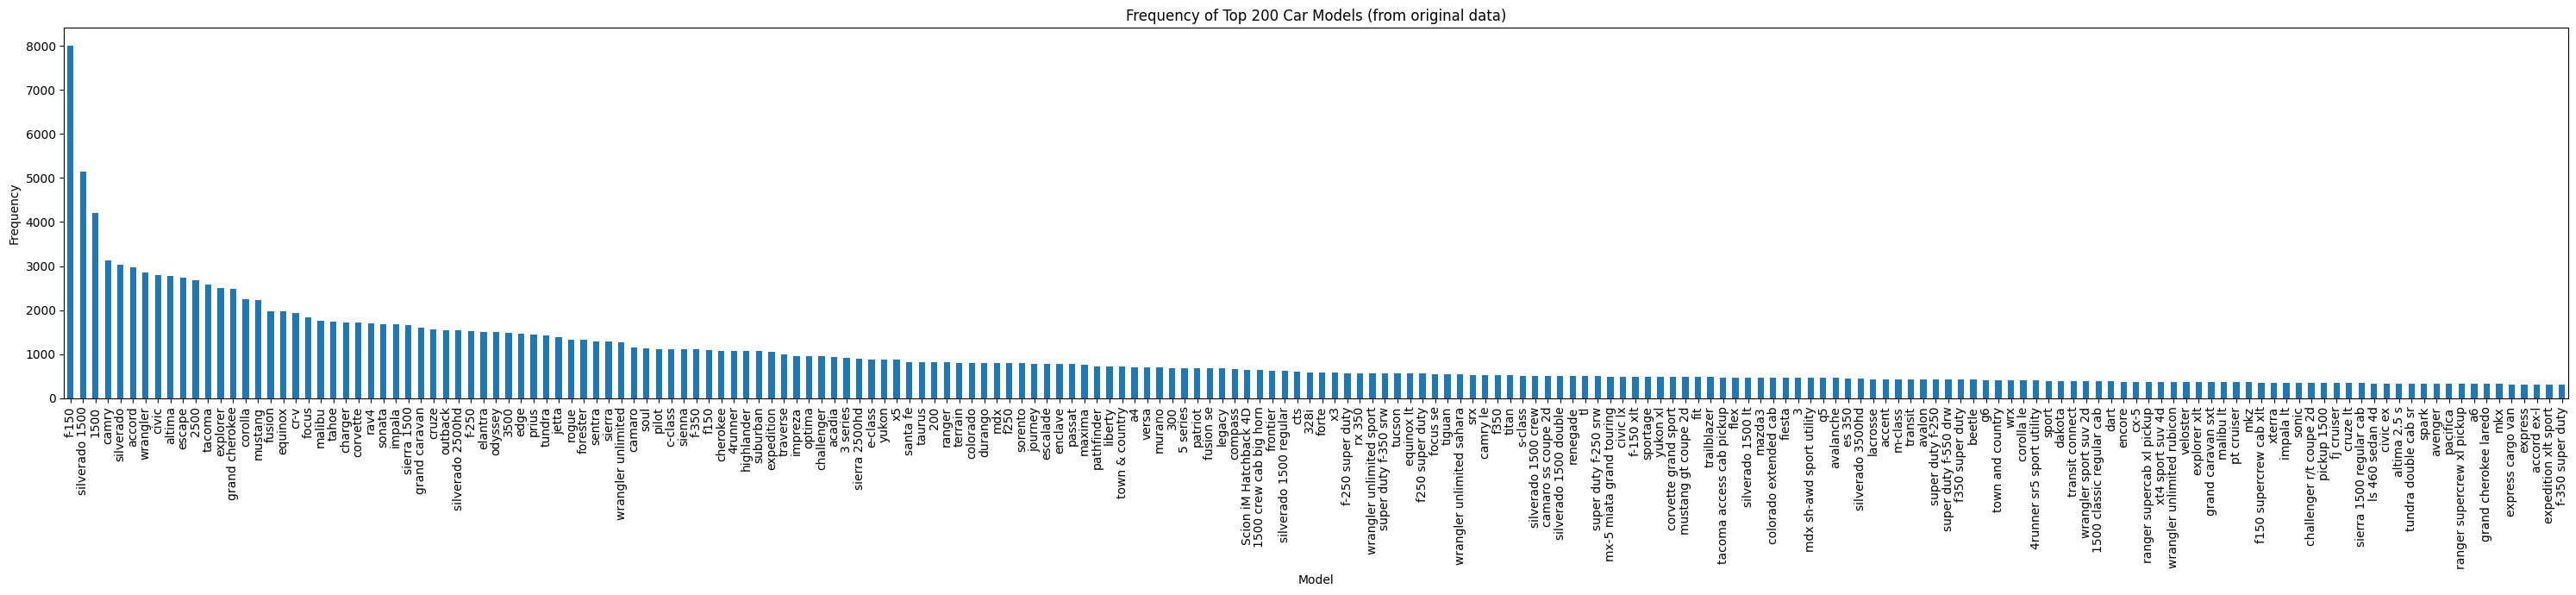

In [423]:
plt.figure(figsize=(30, 7))
vehicles['model'].value_counts().head(200).plot(kind='bar')
plt.title('Frequency of Top 200 Car Models (from original data)')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [424]:
# Drop extremely rare (and low-value) model counts, with no predictive power
model_counts = vehicles['model'].value_counts()
infrequent_models = model_counts[model_counts < 100].index
vehicles_filtered = vehicles[~vehicles['model'].isin(infrequent_models)].copy()

print(f"Original number of rows: {len(vehicles)}")
print(f"Number of rows after filtering infrequent models: {len(vehicles_filtered)}")
print(f"Original models represented: {len(vehicles['model'].unique())}")
print(f"Filtered models represented: {len(vehicles_filtered['model'].unique())}")

Original number of rows: 426880
Number of rows after filtering infrequent models: 268805
Original models represented: 29650
Filtered models represented: 659


In [425]:
def find_matching_key(mapping, s):
    """Return first key in mapping that is substring-related to s, or None."""
    for k in mapping:
        if k in s:
            return k
    return None

for model_name in models.index: # Iterate over the index (model names)
    shortest_match = model_name
    shortest_match_len = len(model_name)

models = vehicles['model'].dropna().value_counts()
model_normalization = {}

for model_name in models.index:  # unique model names, ordered by frequency
    # see if we've already seen something similar
    matched_key = find_matching_key(model_normalization, model_name)

    if matched_key is None:
        # New family of model strings; make this its own canonical form
        model_normalization[model_name] = model_name
    else:
        # Reuse whatever canonical value the matched key already maps to
        model_normalization[model_name] = model_normalization[matched_key]

print(f"Number of unique models: {len(models.index)}")
print(f"Number of models in normalization map: {len(model_normalization)}")
print("\nSample of model_normalization:")
samples_printed = 0
for key in list(model_normalization.keys()):
    if key != model_normalization[key] and samples_printed < 20:
        print(f"'{key}' -> '{model_normalization[key]}'")
        samples_printed = samples_printed+1

Number of unique models: 29649
Number of models in normalization map: 29649

Sample of model_normalization:
'sierra 1500' -> '1500'
'silverado 2500hd' -> 'silverado'
'wrangler unlimited' -> 'wrangler'
'sierra 2500hd' -> '2500'
'fusion se' -> 'fusion'
'1500 crew cab big horn' -> '1500'
'silverado 1500 regular' -> 'silverado 1500'
'f-250 super duty' -> 'f-250'
'wrangler unlimited sport' -> 'wrangler'
'super duty f-350 srw' -> 'f-350'
'equinox lt' -> 'equinox'
'f250 super duty' -> 'f250'
'focus se' -> 'focus'
'wrangler unlimited sahara' -> 'wrangler'
'camry le' -> 'camry'
'silverado 1500 crew' -> 'silverado 1500'
'camaro ss coupe 2d' -> 'camaro'
'silverado 1500 double' -> 'silverado 1500'
'super duty f-250 srw' -> 'f-250'
'civic lx' -> 'civic'


In [426]:
vehicles_filtered.loc[:, 'model'] = vehicles_filtered['model'].dropna()
vehicles_filtered.loc[:, 'model'] = vehicles_filtered['model'].dropna().map(lambda x: model_normalization[x])
vehicles_filtered['model'].value_counts()

,count
model,
1500,10565
f-150,8857
silverado 1500,7981
wrangler,6694
silverado,5832
...,...
monte carlo,108
eos komfort,104
sl-class,104


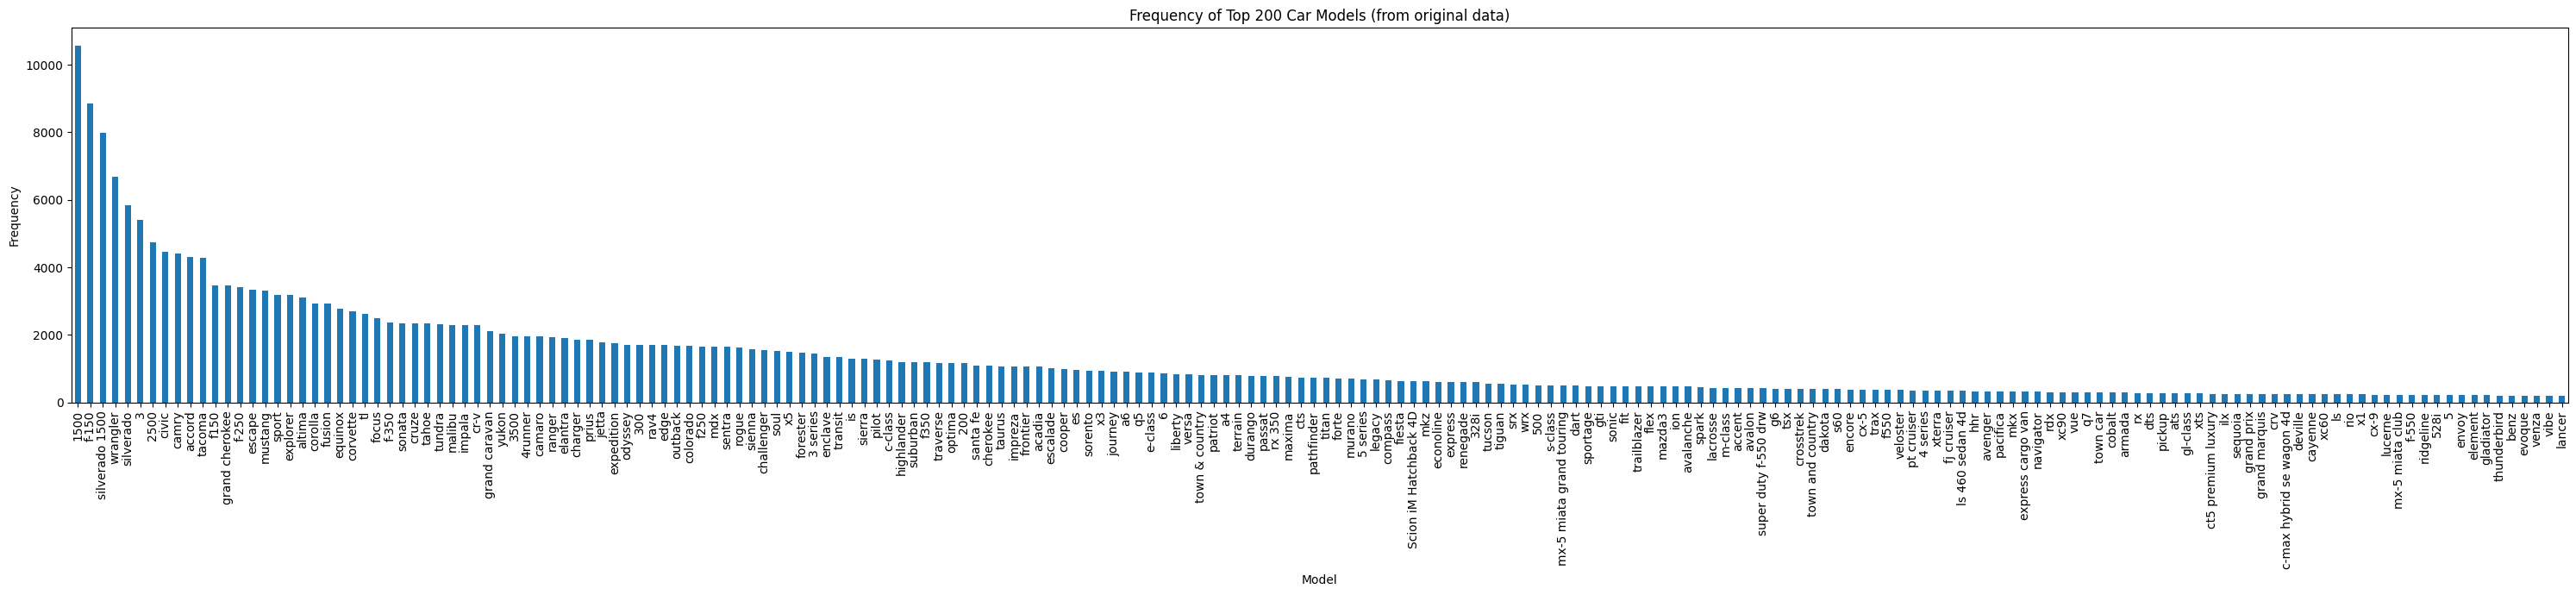

In [427]:
plt.figure(figsize=(30, 7))
vehicles_filtered['model'].value_counts().head(200).plot(kind='bar')
plt.title('Frequency of Top 200 Car Models (from original data)')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Data Preparation

*After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.*


In [428]:
vehicles_clean = vehicles_filtered.copy()

# Drop columns that have no predict value whatsoever (due to uniqueness or redundancy)
vehicles_clean.drop(columns=['id', 'VIN', 'region', 'manufacturer', 'cylinders', 'size'], inplace=True)

# Drop droppable N/A values
for col in ['year', 'model', 'odometer', 'title_status', 'transmission']:
  vehicles_clean.dropna(subset=col, inplace=True)

# Set missing values that we need to retain as unknown
for col in ['fuel', 'drive', 'paint_color']:
    vehicles_clean[col] = vehicles_clean[col].fillna('unknown')

# Zero-valued prices are useless for our model; drop them.
vehicles_clean = vehicles_clean[vehicles_clean['price'] != 0]

# Cast floats as int
vehicles_clean['price'] = vehicles_clean['price'].astype(int)
vehicles_clean['year'] = vehicles_clean['year'].astype(int)
vehicles_clean['odometer'] = vehicles_clean['odometer'].astype(int)

# Consolidate year-model
vehicles_clean.dropna(subset=['year', 'model'], inplace=True)

# Handle missing `condition`s
vehicles_clean['condition'] = vehicles_clean['condition'].fillna('unknown')


In [429]:
# Finally, time to one-hot encode some of the data.
one_hot_columns = ['model', 'condition', 'fuel', 'transmission', 'title_status', 'state', 'type', 'paint_color', 'drive']
vehicles_clean = pd.get_dummies(vehicles_clean, columns=one_hot_columns, drop_first=True)

In [430]:
vehicles_clean.describe()

,price,year,odometer
count,2.364610e+05,236461.000000,2.364610e+05
mean,6.260220e+04,2011.880369,1.000152e+05
std,1.148830e+07,7.209589,1.690477e+05
min,1.000000e+00,1900.000000,0.000000e+00
25%,6.995000e+03,2009.000000,4.213800e+04
50%,1.480000e+04,2013.000000,9.298000e+04
75%,2.699000e+04,2017.000000,1.390000e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [431]:
vehicles_clean.columns

Index(['price', 'year', 'odometer', 'model_200', 'model_2500', 'model_3',
       'model_3 series', 'model_300', 'model_328i', 'model_3500',
       ...
       'paint_color_orange', 'paint_color_purple', 'paint_color_red',
       'paint_color_silver', 'paint_color_unknown', 'paint_color_white',
       'paint_color_yellow', 'drive_fwd', 'drive_rwd', 'drive_unknown'],
      dtype='object', length=370)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [432]:
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [433]:
X_train, X_test = train_test_split(vehicles_clean.drop(columns=['price']), test_size=0.2, random_state=42)
y_train, y_test = train_test_split(vehicles_clean['price'], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_mse = mean_squared_error(y_test, y_pred)
print(math.sqrt(y_mse))


17188052.147720724


Whoa, this RMSE is enormous. Let's see if we have outliers in play here.

In [434]:
vehicles_clean.describe()

,price,year,odometer
count,2.364610e+05,236461.000000,2.364610e+05
mean,6.260220e+04,2011.880369,1.000152e+05
std,1.148830e+07,7.209589,1.690477e+05
min,1.000000e+00,1900.000000,0.000000e+00
25%,6.995000e+03,2009.000000,4.213800e+04
50%,1.480000e+04,2013.000000,9.298000e+04
75%,2.699000e+04,2017.000000,1.390000e+05
max,3.736929e+09,2022.000000,1.000000e+07


Hmmmm, those prices are certainly sus—almost certainly wrong, and skewing the model. Let's tighten that some, by using the interquartile range.

In [435]:
price_lower_bound = vehicles_clean['price'].quantile(0.25)
price_upper_bound = vehicles_clean['price'].quantile(0.75)

vehicles_clean_filtered = vehicles_clean[(vehicles_clean['price'] >= price_lower_bound) & (vehicles_clean['price'] <= price_upper_bound)].copy()

print(f"Original number of rows: {len(vehicles_clean)}")
print(f"Number of rows after filtering by 25th and 75th percentile price: {len(vehicles_clean_filtered)}")
print(f"Price range for filtered data: ${price_lower_bound:.2f} - ${price_upper_bound:.2f}")

Original number of rows: 236461
Number of rows after filtering by 25th and 75th percentile price: 121574
Price range for filtered data: $6995.00 - $26990.00


In [436]:
X_train_2, X_test_2 = train_test_split(vehicles_clean_filtered.drop(columns=['price']), test_size=0.2, random_state=42)
y_train_2, y_test_2 = train_test_split(vehicles_clean_filtered['price'], test_size=0.2, random_state=42)

lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train_2)

y_pred_2 = lr_2.predict(X_test_2)
y_mse_2 = mean_squared_error(y_test_2, y_pred_2)
print(math.sqrt(y_mse_2))

4060.6799556827323


Now just try empirically with some arbitrary values, chosen empirically…

In [437]:
vehicles_arbitrary = vehicles_clean[(vehicles_clean['price'] > 20000) & (vehicles_clean['price'] < 150000)].copy()

print(f"Original number of rows: {len(vehicles_clean)}")
print(f"Number of rows after arbitrary filter: {len(vehicles_arbitrary)}")
print(f"Price range for filtered data: ${vehicles_arbitrary['price'].min()} - ${vehicles_arbitrary['price'].max()}")



Original number of rows: 236461
Number of rows after arbitrary filter: 84954
Price range for filtered data: $20008 - $148000


In [438]:
X_train_3, X_test_3 = train_test_split(vehicles_arbitrary.drop(columns=['price']), test_size=0.2, random_state=42)
y_train_3, y_test_3 = train_test_split(vehicles_arbitrary['price'], test_size=0.2, random_state=42)

lr_3 = LinearRegression()
lr_3.fit(X_train_3, y_train_3)

y_pred_3 = lr_3.predict(X_test_3)
y_mse_3 = mean_squared_error(y_test_3, y_pred_3)
print(math.sqrt(y_mse_3))

8479.343032326231


That's more like it. Of these three, the IQR-based one performs best, so let's proceed with that. But first, let's see if we can do better by also limiting to the IQR for odometer readings too.

In [439]:
odometer_lower_bound = vehicles_clean['odometer'].quantile(0.25)
odometer_upper_bound = vehicles_clean['odometer'].quantile(0.75)

vehicles_clean_filtered = vehicles_clean[(vehicles_clean['price'] >= price_lower_bound) & (vehicles_clean['price'] <= price_upper_bound) & (vehicles_clean['odometer'] >= odometer_lower_bound) & (vehicles_clean['odometer'] <= odometer_upper_bound)].copy()

print(f"Original number of rows: {len(vehicles_clean)}")
print(f"Number of rows after filtering by 25th and 75th percentile price and odometer: {len(vehicles_clean_filtered)}")
print(f"Price range for filtered data: ${lower_bound:.2f} - ${upper_bound:.2f}")

Original number of rows: 236461
Number of rows after filtering by 25th and 75th percentile price and odometer: 75075
Price range for filtered data: $6500.00 - $23995.00


In [440]:
vehicles_clean_filtered.describe()

,price,year,odometer
count,75075.000000,75075.000000,75075.000000
mean,14793.777369,2012.252294,91812.778848
std,5469.148036,5.871108,26062.562758
min,6995.000000,1928.000000,42138.000000
25%,9995.000000,2011.000000,71288.000000
50%,13995.000000,2013.000000,92720.000000
75%,18900.000000,2015.000000,113000.000000
max,26990.000000,2021.000000,139000.000000


In [441]:
X_train_4, X_test_4 = train_test_split(vehicles_clean_filtered.drop(columns=['price']), test_size=0.2, random_state=42)
y_train_4, y_test_4 = train_test_split(vehicles_clean_filtered['price'], test_size=0.2, random_state=42)

lr_4 = LinearRegression()
lr_4.fit(X_train_2, y_train_2)

y_pred_4 = lr_2.predict(X_test_4)
y_mse_4 = mean_squared_error(y_test_4, y_pred_4)
print(math.sqrt(y_mse_4))

3637.7433552001926


### Evaluation

_With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client._

At this point, we'll examine the linear regression model to see which coefficients turned out to be most important.

In [442]:
coefficients = pd.DataFrame({
    'feature': X_train_4.columns,
    'coefficient': lr_4.coef_
})

coefficients['abs_coefficient'] = abs(coefficients['coefficient'])
coefficients = coefficients.sort_values(by='abs_coefficient', ascending=False)

print("Top 100 features with the largest absolute coefficients:")
print(coefficients.head(100))

print("\nTop 100 features with the largest positive coefficients:")
print(coefficients.sort_values(by='coefficient', ascending=False).head(100))

print("\nTop 100 features with the largest negative coefficients:")
print(coefficients.sort_values(by='coefficient', ascending=True).head(100))

Top 100 features with the largest absolute coefficients:
                                  feature   coefficient  abs_coefficient
64                            model_coupe  35667.577150     35667.577150
49                          model_century  26292.589528     26292.589528
106                            model_f100  17589.954862     17589.954862
41                              model_c10  17041.035250     17041.035250
169                     model_monte carlo  15949.572496     15949.572496
34                             model_aveo -14544.027494     14544.027494
84                        model_el camino  13167.512966     13167.512966
185                          model_pickup  12180.781732     12180.781732
162                          model_mirage -10804.803759     10804.803759
238                     model_thunderbird  10666.739949     10666.739949
77                          model_deville  10639.558325     10639.558325
256                           model_versa  -9961.006744      9961.0

The following results are evident:
- Model is _extremely_ important to valuation—moreso than any other single metric. This is to be expected, of course: Corvettes are expensive regardless of their condition, while a used Ford Focus even in the best condition isn't in particularly strong demand.
- Year is also an important factor.
- Surprisingly, a vehicle's being hybrid turned out to be a _negative_ influence on price, and in fact was the least profitable fuel type (not counting "unknown"); however, electric cars tended to be valued more highly than gas cars.
- Odometer readings were not significantly correlated with prices, even after dropping outliers.
- In terms of registration state, Hawaii cars tended to be valued more highly, and Michigan lower.
- Condition had a mixed impact: Unknown conditions were most positive, followed by salvage, then like new, new, good, and fair. This mostly matches intuition, with the exception of unknown and salvage.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

# Methodology

The used car dataset was explored and cleaned using industry-standard techniques. Data gaps and quality problems were addressed. To deal with wide variation in how models were reported, a model name standardization process was applied. Variables were examined to identify which are important in determining sale prices.

# Findings

Model, year, and condition are the most important factors driving the value of a car, so dealers are advised to prioritize these factors in selecting inventory.

American "muscle cars" and trucks were particularly notable in the top selections. The overall top models were:
- Corvette (all types)
- Ford Mustang
- Jeep Wrangler
- Chevrolet 3500
- Chevrolet Camaro
- Chevrolet 2500
- Toyota Tundra
- Ford F-350
- Toyota Tacoma
- Ford F-250

In contrast, compact cars and Japanese cars were decidedly unpopular with customers, and had a negative impact on price, with the following cars being lowest priced:
- Chevrolet Cruze
- Hyundai Elantra
- Nisaan Sentra
- Kia Soul
- Volkswagen Jetta
- Hyandai Sonata
- Toyota Prius
- Toyota Corolla
- Nissan Altima
- Ford Fusion

Fuel type (particularly hybrid fuel) was not a help in pricing, and odometer readings did not significantly impact pricing (at least, not in a way that outweighed the model year that more closely correlates with price).

State of registration was also significantly correlated with price, but it is unclear whether this amounts to a significant enough effect to justify transporting inventory.

# Recommendations

Higher-valued cars are likely to bring higher margins, and these are likely to perform better in outweighing transaction costs and other overhead. Therefore, clients are advised to focus on highest-valued variables, in particular:
- Model: Focus on those with higher sale price, particularly American muscle cars and trucks. Avoid compact cars and Japanese cars.
- Prefer recent model years.
- Prefer cars in good condition.
- Disregard odometer readings.